In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import linregress

In [9]:
def polynomial_regression(X, y, order=1, confidence=95, num=100):
    confidence = 1 - ((1 - (confidence / 100)) / 2)
    y_model = np.polyval(np.polyfit(X, y, order), X)
    residual = y - y_model
    n = X.size                     
    m = 2                          
    dof = n - m  
    t = stats.t.ppf(confidence, dof) 
    std_error = (np.sum(residual**2) / dof)**.5
    X_line = np.linspace(np.min(X), np.max(X), num)
    y_line = np.polyval(np.polyfit(X, y, order), X_line)
    ci = t * std_error * (1/n + (X_line - np.mean(X))**2 / np.sum((X - np.mean(X))**2))**.5
    return X_line, y_line, ci

In [109]:
typ = 'genes'

In [110]:
#real data
df = pd.read_csv('hypothalamus_gtex_' + typ, sep =' ', header=None)
df.columns = ['explevel', typ, 'depth', 'depth_unique', 'sample']
df

,explevel,genes,depth,depth_unique,sample
0,high,3560,31765066,28112083,hypothalamus_TPM/SRR1071289_TPM
1,mid,1554,31765066,28112083,hypothalamus_TPM/SRR1071289_TPM
2,low,1499,31765066,28112083,hypothalamus_TPM/SRR1071289_TPM
3,high,9212,52524935,47234412,hypothalamus_TPM/SRR1071880_TPM
4,mid,1310,52524935,47234412,hypothalamus_TPM/SRR1071880_TPM
...,...,...,...,...,...
304,mid,1875,67134874,58244625,hypothalamus_TPM/SRR820256_TPM
305,low,2463,67134874,58244625,hypothalamus_TPM/SRR820256_TPM
306,high,6539,55977418,48250726,hypothalamus_TPM/SRR820379_TPM
307,mid,2155,55977418,48250726,hypothalamus_TPM/SRR820379_TPM


In [111]:
grouped_df = df.groupby('sample').sum() #sum all genes in the sample disregarding its expression level
grouped_df["depth"] = grouped_df["depth"]/3 #correct the depths that were summed three times
grouped_df["depth_unique"] = grouped_df["depth_unique"]/3 #correct the depths that were summed three times
grouped_df

,genes,depth,depth_unique
sample,,,
hypothalamus_TPM/SRR1071289_TPM,6613,31765066.0,28112083.0
hypothalamus_TPM/SRR1071880_TPM,12638,52524935.0,47234412.0
hypothalamus_TPM/SRR1072504_TPM,13077,54792655.0,49482607.0
hypothalamus_TPM/SRR1072797_TPM,12004,35259031.0,32625945.0
hypothalamus_TPM/SRR1080172_TPM,11137,35040045.0,31895698.0
...,...,...,...
hypothalamus_TPM/SRR665502_TPM,11837,53932097.0,44106788.0
hypothalamus_TPM/SRR818270_TPM,12014,85074305.0,73700875.0
hypothalamus_TPM/SRR818348_TPM,12934,63175112.0,54460094.0


In [112]:
bins = [0, 50000000, 100000000, 150000000, 200000000, 250000000]
labels = ['{}'.format(i, j) for i, j in zip([50, 100, 150, 200, 250], [50, 100, 150, 200, 250])]
grouped_df['bin_column'] = pd.cut(grouped_df['depth_unique'], bins=bins, labels=labels)
grouped_df_sample_counts = grouped_df.groupby('bin_column').count()
grouped_df_sample_counts

,genes,depth,depth_unique
bin_column,,,
50,85,85,85
100,17,17,17
150,0,0,0
200,0,0,0
250,1,1,1


In [113]:
#only >50M and >100M will be used to make a barplot
to_plot_df = grouped_df[(grouped_df['bin_column'] == '50') | (grouped_df['bin_column'] == '100')]
to_plot_df

,genes,depth,depth_unique,bin_column
sample,,,,
hypothalamus_TPM/SRR1071289_TPM,6613,31765066.0,28112083.0,50
hypothalamus_TPM/SRR1071880_TPM,12638,52524935.0,47234412.0,50
hypothalamus_TPM/SRR1072504_TPM,13077,54792655.0,49482607.0,50
hypothalamus_TPM/SRR1072797_TPM,12004,35259031.0,32625945.0,50
hypothalamus_TPM/SRR1080172_TPM,11137,35040045.0,31895698.0,50
...,...,...,...,...
hypothalamus_TPM/SRR665502_TPM,11837,53932097.0,44106788.0,50
hypothalamus_TPM/SRR818270_TPM,12014,85074305.0,73700875.0,100
hypothalamus_TPM/SRR818348_TPM,12934,63175112.0,54460094.0,100


In [114]:
depth_50_mean = to_plot_df[to_plot_df['bin_column'] == '50'][typ].mean()
depth_50_std = to_plot_df[to_plot_df['bin_column'] == '50'][typ].std()

depth_100_mean = to_plot_df[to_plot_df['bin_column'] == '100'][typ].mean()
depth_100_std = to_plot_df[to_plot_df['bin_column'] == '100'][typ].std()

yerr = [depth_50_std, depth_100_std]

In [115]:
#estimated
df = pd.read_csv('hypothalamus_SRR1443713_' + typ, sep =' ', header=None)
df.columns = ['explevel', typ, 'depth', 'depth_unique', 'sample']
df

,explevel,genes,depth,depth_unique,sample
0,high,5460,100000000,100000000,SRR1443713_TPM_1
1,mid,2195,100000000,100000000,SRR1443713_TPM_1
2,low,8123,100000000,100000000,SRR1443713_TPM_1
3,high,5462,100000000,100000000,SRR1443713_TPM_2
4,mid,2209,100000000,100000000,SRR1443713_TPM_2
...,...,...,...,...,...
1195,mid,1985,50000000,50000000,SRR1443713_TPM_399
1196,low,6290,50000000,50000000,SRR1443713_TPM_399
1197,high,5281,50000000,50000000,SRR1443713_TPM_400
1198,mid,1974,50000000,50000000,SRR1443713_TPM_400


In [116]:
grouped_df = df.groupby('sample').sum() #sum all genes in the sample disregarding its expression level
grouped_df["depth"] = grouped_df["depth"]/3 #correct the depths that were summed three times
grouped_df["depth_unique"] = grouped_df["depth_unique"]/3 #correct the depths that were summed three times


bins = [0, 50000000, 100000000, 150000000, 200000000, 250000000]
labels = ['{}'.format(i, j) for i, j in zip([50, 100, 150, 200, 250], [50, 100, 150, 200, 250])]
grouped_df['bin_column'] = pd.cut(grouped_df['depth_unique'], bins=bins, labels=labels)
grouped_df_sample_counts = grouped_df.groupby('bin_column').count()
grouped_df_sample_counts

to_plot_df = grouped_df
grouped_df

,genes,depth,depth_unique,bin_column
sample,,,,
SRR1443713_TPM_1,15778,100000000.0,100000000.0,100
SRR1443713_TPM_10,15789,100000000.0,100000000.0,100
SRR1443713_TPM_100,15761,100000000.0,100000000.0,100
SRR1443713_TPM_101,16999,150000000.0,150000000.0,150
SRR1443713_TPM_102,16997,150000000.0,150000000.0,150
...,...,...,...,...
SRR1443713_TPM_95,15766,100000000.0,100000000.0,100
SRR1443713_TPM_96,15781,100000000.0,100000000.0,100
SRR1443713_TPM_97,15756,100000000.0,100000000.0,100


In [117]:
est_depth_50_mean = to_plot_df[to_plot_df['bin_column'] == '50'][typ].mean()
est_depth_50_std = to_plot_df[to_plot_df['bin_column'] == '50'][typ].std()

est_depth_100_mean = to_plot_df[to_plot_df['bin_column'] == '100'][typ].mean()
est_depth_100_std = to_plot_df[to_plot_df['bin_column'] == '100'][typ].std()

est_depth_150_mean = to_plot_df[to_plot_df['bin_column'] == '150'][typ].mean()
est_depth_150_std = to_plot_df[to_plot_df['bin_column'] == '150'][typ].std()

est_depth_200_mean = to_plot_df[to_plot_df['bin_column'] == '200'][typ].mean()
est_depth_200_std = to_plot_df[to_plot_df['bin_column'] == '200'][typ].std()


est_yerr = [est_depth_50_std, est_depth_100_std, est_depth_150_std, est_depth_200_std]

data = [[50, est_depth_50_mean], [100, est_depth_100_mean], [150, est_depth_150_mean], [200, est_depth_200_mean]]

df = pd.DataFrame(data, columns = ['depth', 'counts'])
X_line, y_line, ci = polynomial_regression(df['depth'], df['counts'], 2)
coef_array = np.polyfit(df['depth'], df['counts'], 2)
coef_array #coef_array[0] * 50 * 50 + coef_array[1] *50 + coef_array[3]
a0 = coef_array[0] * 25 * 25 + coef_array[1] * 25 + coef_array[2]
a = coef_array[0] * 50 * 50 + coef_array[1] * 50 + coef_array[2]
b = coef_array[0] * 100 * 100 + coef_array[1] * 100 + coef_array[2]
c = coef_array[0] * 150 * 150 + coef_array[1] * 150 + coef_array[2]
d = coef_array[0] * 200 * 200 + coef_array[1] * 200 + coef_array[2]
e = coef_array[0] * 250 * 250 + coef_array[1] * 250 + coef_array[2]
data

[[50, 13578.66], [100, 15767.69], [150, 16999.25], [200, 17839.79]]

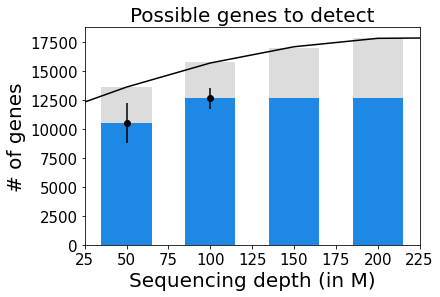

In [118]:
plt.bar([50.0, 100.0, 150.0, 200.0], [est_depth_50_mean, est_depth_100_mean, est_depth_150_mean, est_depth_200_mean], 30, color = '#DCDCDC')
#plt.errorbar([50.0, 100.0, 150.0, 200.0], [est_depth_50_mean, est_depth_100_mean, est_depth_150_mean, est_depth_200_mean], yerr = est_yerr, 
#             fmt="o", color = 'black')


plt.bar([50.0, 100.0, 150.0, 200.0], [depth_50_mean, depth_100_mean, depth_100_mean, depth_100_mean], 30, 
        color = '#1E88E5')
plt.errorbar([50.0, 100.0], [depth_50_mean, depth_100_mean], yerr = yerr, 
             fmt="o", color = 'black')

plt.plot([25.0, 50.0, 100.0, 150.0, 200.0, 250.0], [a0, a, b, c, d, e], color = 'black')
plt.xlim(25, 225)
 
plt.title('Possible ' + typ + ' to detect', fontsize = 20)
plt.ylabel("# of " + typ, fontsize = 20)
plt.yticks(fontsize = 15)
plt.xlabel('Sequencing depth (in M)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()